# Statistical Thinking in Python (Part 1)

## Chapter 1. Graphical EDA

Yogi Berra said, "You can observe a lot by watching." The same is true with data. If you can appropriately display your data, you can already start to draw conclusions from it. I'll go even further. Exploring your data is a crucial step in your analysis.

## Tuky's comment on exploratory data analysis
When I say exploring your data, I mean organizing and plotting your data, and maybe computing a few numerical summaries about them. This idea is known as exploratory data analysis, or EDA, and was developed by one of the greatest statisticians of all time, John Tukey. He wrote a book entitled Exploratory Data Analysis in 1977 where he laid out the principles. In that book, he said,  
> **"Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone."**

I wholeheartedly agree with this, so we will begin our study of statistical thinking with EDA. Let's consider an example.

In [48]:
# Importing the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the datasets
all_states = pd.read_csv('datasets/2008_all_states.csv')
swing_states = pd.read_csv('datasets/2008_swing_states.csv')

## 2008 US swing state election results 
Here, we have a data set from [Data.gov](https://www.data.gov/) containing the election results of 2008 at the county level in each of the three major swing states of Pennsylvania, Ohio, and Florida. Those are the ones that largely decide elections in the US. 

In [49]:
swing_states[['state','county','dem_share']]

,state,county,dem_share
0,PA,Erie County,60.08
1,PA,Bradford County,40.64
2,PA,Tioga County,36.07
3,PA,McKean County,41.21
4,PA,Potter County,31.04
...,...,...,...
217,OH,Hamilton County,53.53
218,OH,Highland County,36.54
219,OH,Hocking County,49.58
220,OH,Licking County,41.97


## Plot the results with a histogram
We take the Democratic share of the vote in the counties of all of the three swing states and plot them as a histogram. We can plot this as a histogram using the `matplotlib.pyplot` module's hist function. The height of each bar is the number of counties that had the given level of support for Obama. For example, the tallest bar is the number of counties that had between 40% and 50% of its votes cast for Obama. Right away, because there is more area in the histogram to the left of 50%, we can see that more counties voted for Obama's opponent, John McCain, than voted for Obama. Look at that. Just by making one plot, we could already draw a conclusion about the data, which would have been extraordinarily tedious by hand counting in the DataFrame.

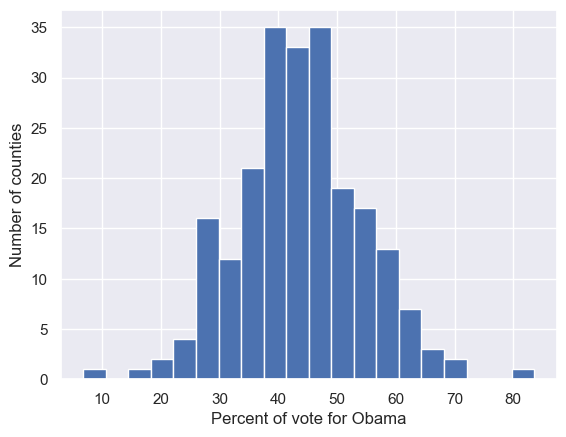

In [50]:
# Set default Seaborn style
sns.set()

plt.hist(swing_states['dem_share'], bins=20) # Alternatively, we can change the bin size as e.g. bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.xlabel('Percent of vote for Obama')
plt.ylabel('Number of counties')
plt.show()

## Drawback of histograms and Bee swamp plots

The histogram of county-level election data was informative. We learned that more counties voted for McCain than for Obama. However, **a major drawback of using histograms** is that   
1. **the same data set can look different depending on how the bins are chosen.** And choice of bins is in many ways arbitrary. This leads to **binning bias**; you might interpret your plot differently for two different choices of bin number.  
2. An additional problem with histograms is that we are not plotting all of the data. That is, **we are sweeping the data into bins, and losing their actual values.**

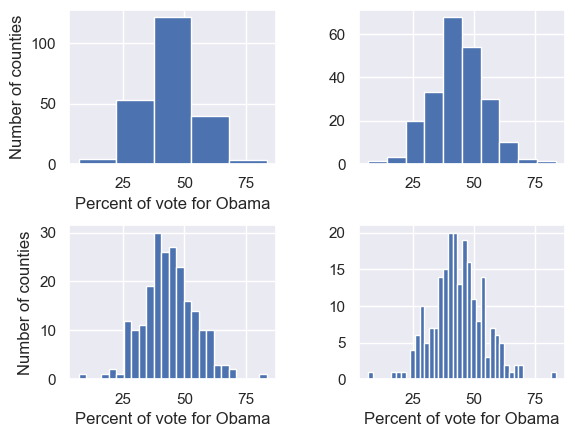

In [51]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
plt.hist(swing_states['dem_share'], bins=5)
plt.xlabel('Percent of vote for Obama')
plt.ylabel('Number of counties')

ax = fig.add_subplot(2, 2, 2)
plt.hist(swing_states['dem_share'], bins=10)

ax = fig.add_subplot(2, 2, 3)
plt.hist(swing_states['dem_share'], bins=25)
plt.xlabel('Percent of vote for Obama')
plt.ylabel('Number of counties')

ax = fig.add_subplot(2, 2, 4)
plt.hist(swing_states['dem_share'], bins=40)
plt.xlabel('Percent of vote for Obama')

plt.show()

## Remedy: Bee swarm plot  
To remedy these problems we can make a bee swarm plot, also called a swarm plot. This is best shown by example. Here is a beeswarm plot of the vote totals in the three swing states. Each point in the plot represents the share of the vote Obama got in a single county. The position along the y-axis is the quantitative information. The data are spread in x to make them visible, but their precise location along the x-axis is unimportant. Notably, we no longer have any binning bias and all data are displayed. This plot may be conveniently generated using Seaborn. A requirement is that your data are in a well-organized Pandas DataFrame where each column is a feature and each row an observation. In this case, an observation is a county, and the features are state and the Democratic share of the vote.

### Generating a bee swarm plot  
A requirement is that your data are in a well-organized Pandas DataFrame where each column is a feature and each row an observation. In this case, an observation is a county, and the features are state and the Democratic share of the vote. To make the plot, you need to specify which column gives the values for the y-axis, in this case the share of the vote that went to the Democrat Barack Obama, and the values for the x-axis, in this case the state. And of course, you need to tell it which DataFrame contains the data.

### 2008 US swing state election results
From this plot, too, we can clearly see that Obama got less than 50% of the vote in the majority of counties in each of the three swing states. This time it is more detailed than a histogram, but without too much added visual complexity.

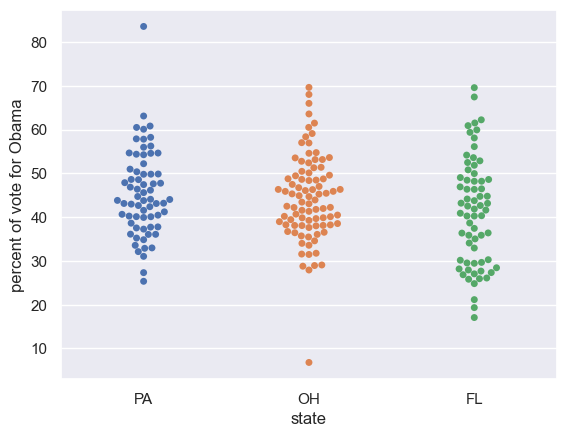

In [52]:
# Set default Seaborn style
sns.set()

sns.swarmplot(x='state', y='dem_share', data= swing_states, hue="state")
plt.xlabel('state')
plt.ylabel('percent of vote for Obama')
plt.legend([],[], frameon=False)
plt.show()

## Limited efficiency of swarm plots
We saw in the above plot the clarity of bee swarm plots. However, there is a limit to their efficacy. For example, imagine we wanted to plot the county-level voting data for all states divided as east of the Mississippi River and all states west.  

### 2008 US election results: East and West
We make the swarm plot as before, but using a DataFrame that contains all states, with each classified as being east or west of the Mississippi. The bee swarm plot has a real problem. The edges have overlapping data points, which was necessary in order to fit all points onto the plot. We are now obfuscating data. So, using a bee swarm plot here is not the best option.  

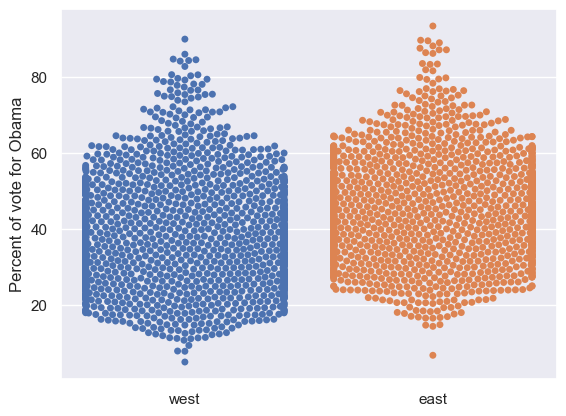

In [53]:
sns.swarmplot(x='east_west', y='dem_share', data= all_states, hue='east_west')
plt.ylabel('Percent of vote for Obama')
plt.xlabel('')
plt.legend([],[], frameon=False)
plt.show()

## Empirical cumulative distribution function (ECDF)
As an alternative, we can compute an empirical cumulative distribution function, or ECDF. Again, this is best explained by example. Here is a picture of an ECDF of the percentage of swing state votes that went to Obama. A x-value of an ECDF is the quantity you are measuring, in this case the percent of vote that sent to Obama. The y-value is the fraction of data points that have a value smaller than the corresponding x-value. For example, 20% of counties in swing states had 36% or less of its people vote for Obama. Similarly, 75% of counties in swing states had 50% or less of its people vote for Obama.  

In [54]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

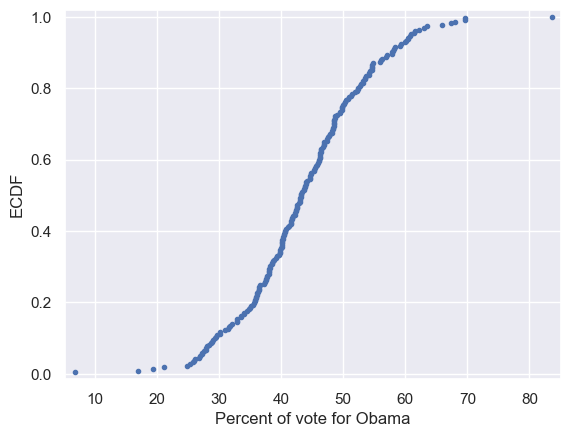

In [55]:
x, y = ecdf(swing_states['dem_share'])
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Percent of vote for Obama')
plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges
plt.show()

## 2008 US swing state election ECDF
Let's look at how to make one of these from our data. The x-axis is the sorted data. We need to generate it using the NumPy function sort, so we need to import Numpy, which we do using the alias np as is commonly done. The we can use np dot sort to generate our x-data. The y-axis is evenly spaced data points with a maximum of one, which we can generate using the np dot arange function and then dividing by the total number of data points. Once we specify the x and y values, we plot the points. By default, plt-dot-plot plots lines connecting the data points. To plot our ECDF, we just want points. To achieve this we pass the string period and the string 'none' to the keywords arguments marker and linestyle, respectively. Finally, we use the plt dot margins function to make sure none of the data points run over the side of the plot area. Choosing a value of point-02 gives a 2% buffer all around the plot.

## Multiple ECDFs
We can also easily plot multiple ECDFs on the same plot. For example, here are the ECDFs for the three swing states. We see that Ohio and Pennsylvania were similar, with Pennsylvania having slightly more Democratic counties. Florida, on the other hand, had a greater fraction of heavily Republican counties. *In my workflow, I almost always plot the ECDF first. It shows all the data and gives a complete picture of how the data are distributed.*

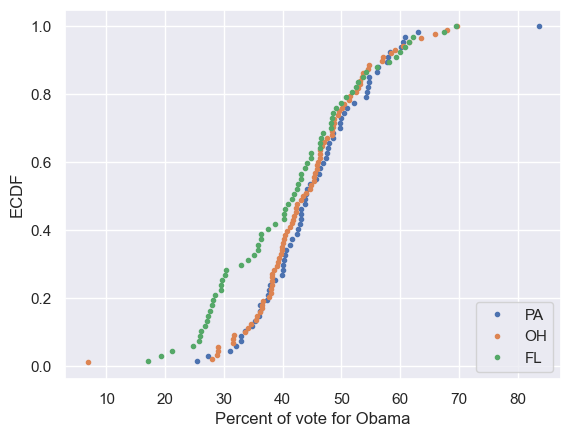

In [56]:
# Compute ECDFs
x_pa, y_pa = ecdf(swing_states[swing_states['state'] == 'PA']['dem_share'])
x_oh, y_oh = ecdf(swing_states[swing_states['state'] == 'OH']['dem_share'])
x_fl, y_fl = ecdf(swing_states[swing_states['state'] == 'FL']['dem_share'])

# Plot all ECDFs on the same plot
_ = plt.plot(x_pa, y_pa, marker='.', linestyle='none')
_ = plt.plot(x_oh, y_oh, marker='.', linestyle='none')
_ = plt.plot(x_fl, y_fl, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('PA', 'OH', 'FL'), loc='lower right')
plt.xlabel('Percent of vote for Obama')
plt.ylabel('ECDF')

# Display the plot
plt.show()

## Onward toward the whole story!
You now have some great graphical EDA tools. You can quickly generate and investigate a histogram. You can immediately get a feel for your data by plotting all of them, with bee swarm plots or ECDFs. In almost every data set we encounter in this course, and in its sequel, and also in real life, we start with graphical EDA. Remember what Tukey said,

> “Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone.” — John Tukey

### Coming up
In the next chapter, we will build upon graphical EDA with quantitative EDA, which allows you to compute useful summary statistics. With our foundation stone in place, we will spend the last half of this course learning to **think probabilistically.** We will learn about **probability distributions for both discrete and continuous variables**, which provide the mathematical foundation for you to draw meaningful conclusions from your data. We will not get mired in mathematical details, but rather will unleash **the power of the NumPy random module to use hacker statistics** in order to simulate the probabilistic stories and distributions that we encounter. We will find that by writing a few lines of Python code, we can perform even putatively complicated statistical analyses. As we work through this course and its sequel, we will grow ever closer to being able to tell what Tukey calls **"the whole story."**